# 2022-08-07 Underwater City

- first serious image
- working around my VRAM limitations on my desktop pc
    - 1 generation pass in home devlab to get image composition
    - init image in colabs with above, leveraging higher VRAM
        - disable `secondary_model` (Diffusion Model)
        - use ViTL14 CLIP model
- initial experiments with this approach yesterday went well
    - takeaways include:
        - base image will by necessity lose all of its detail in 2nd pass
        - the `secondary_model` is going to have a harder time with many artists
        - due to this, artist selection for 1st pass is about perspective/composition of their work
        - the style will be deterined by the second pass
        - the first pass will set the general color pallete
        - the second pass will build on this, set highlights / lighting etc

- to build on what I learned yesterday
    - ill be designing the complete prompt I think will work from the start
    - I'll then create a variant of that prompt specific to the base image, adjusting as i go
    - i'll keep tweaking the base image until I get:
        a) the landscape composition broadly correct
        b) the water colours broadly correct
    - ill then take that to Colab and work with the initial prompt to:
        a) get the art style I desire
        b) add in the city completely
        c) add in lighting effects incl. highlights
        
- misc points of note
    - because I'm desiring verticality, ive rotated the resolution from yesterday to **512x832**

## Base Image

In [ ]:
### Prompt

In [ ]:
0: [
"An underwater cliff face drops away suddenly into a deep blue, almost black ocean depth that seems to go down forever. An underwater chasm:3",
"by John Atkinson Grimshaw and Peter Mohrbacher:2",
"fog, steam, text, signature, signatures, blur, blurry, depth of field, dof, bokeh, watermark, jpeg artifacts, specular highlights, noise, pixilation, low quality:-2",
"featured on ArtStation, trending on ArtStation, cgsociety, trending on 500px, deviantart:1",
"Unreal engine, Unity 3D, ray tracing, Octane render, CGI:1",
"volumetric lighting, in the golden hour, dynamic lighting, dramatic lighting:1",
"ultra wide angle, wide-angle, ultrawide:1"
]

In [ ]:
{
    # Prompt & Settings
    "text_prompts": {
        "0": [
            "An underwater cliff face drops away suddenly into a deep blue, almost black ocean depth that seems to go down forever. An underwater chasm:3",
            "by John Atkinson Grimshaw and Peter Mohrbacher:2",
            "fog, steam, text, signature, signatures, blur, blurry, depth of field, dof, bokeh, watermark, jpeg artifacts, specular highlights, noise, pixilation, low quality:-2",
            "featured on ArtStation, trending on ArtStation, cgsociety, trending on 500px, deviantart:1",
            "Unreal engine, Unity 3D, ray tracing, Octane render, CGI:1",
            "volumetric lighting, in the golden hour, dynamic lighting, dramatic lighting:1",
            "ultra wide angle, wide-angle, ultrawide:1"
        ]
    },
    "init_image": "",
    "image_prompts": {},
    
    # Output Settings
    "width":  512,
    "height": 832,
    "steps":  250, # Iterations in VoC
    
    # Diffusion Model & Settings
    "diffusion_model":         "512x512_diffusion_uncond_finetune_008100",
    "use_secondary_model":     true,
    "diffusion_sampling_mode": "plms",
    
    # CLIP Models
    "ViTB32":                        false,
    "ViTB16":                        true,
    "ViTL14":                        false,
    "ViTL14_336px":                  false,
    "RN101":                         true,
    "RN50":                          false,
    "RN50x4":                        false,
    "RN50x16":                       false,
    "RN50x64":                       false,
    "ViTB32_laion2b_e16":            false,
    "ViTB32_laion400m_e31":          false,
    "ViTB32_laion400m_32":           false,
    "ViTB32quickgelu_laion400m_e31": false,
    "ViTB32quickgelu_laion400m_e32": false,
    "ViTB16_laion400m_e31":          false,
    "ViTB16_laion400m_e32":          false,
    "RN50_yffcc15m":                 false,
    "RN50_cc12m":                    false,
    "RN50_quickgelu_yfcc15m":        false,
    "RN50_quickgelu_cc12m":          false,
    "RN101_yfcc15m":                 false,
    "RN101_quickgelu_yfcc15m":       false,
    
    # General Settingss
    "clip_guidance_scale": 60000,
    "tv_scale":            8000,
    "range_scale":         100000,
    "sat_scale":           65000,
    "cutn_batches":        1,
    "max_frames":          10000,
    "init_scale":          1000,
    "skip_steps":          10,
    "perlin_init":         false,
    "perlin_mode":         "mixed",
    "skip_augs":           false,
    "randomize_class":     true,
    "clip_denoised":       false,
    "clamp_grad":          true,
    "clamp_max":           0.025,
    "seed":                188126024,
    "fuzzy_prompt":        false,
    "rand_mag":            0.05,
    "eta":                 0.8,
    "use_horizontal_symmetry": false,
    "use_vertical_symmetry":   false,
    
    # Cut Scheduling
    "cut_overview": "[14]*200+[12]*200+[4]*400+[0]*200",
    "cut_innercut": "[2]*200+[4]*200+[20]*600",
    "cut_ic_pow":   "[100]*900+[40]*100",
    "cut_icgray_p": "[0.7]*100+[0.6]*100+[0.45]*100+[0.3]*100+[0]*600",
    
    # Unknown Settings - yet to work out what these do
    "interp_spline":   "Linear",
    "key_frames":      true,
    "diffusion_steps": 1000,
    
    # Unused / Irrelevant to Image Generation (minified)
    "frames_scale": 1500,"frames_skip_steps": "60%","angle": "0:(0)","zoom": "0: (1), 10: (1.05)","translation_x": "0: (0)","translation_y": "0: (0)","translation_z": "0: (10.0)","rotation_3d_x": "0: (0)","rotation_3d_y": "0: (0)","rotation_3d_z": "0: (0)","midas_depth_model": "dpt_large","midas_weight": 0.3,"near_plane": 200,"far_plane": 10000,"fov": 40,"padding_mode": "border","sampling_mode": "bicubic","video_init_path": "/content/drive/MyDrive/init.mp4","extract_nth_frame": 2,"video_init_seed_continuity": false,"turbo_mode": false,"turbo_steps": "3","turbo_preroll": 10,"transformation_percent": [0.09],"video_init_steps": 100,"video_init_clip_guidance_scale": 1000,"video_init_tv_scale": 0.1,"video_init_range_scale": 150,"video_init_sat_scale": 300,"video_init_cutn_batches": 4,"video_init_skip_steps": 50,"video_init_frames_scale": 15000,"video_init_frames_skip_steps": "70%","video_init_flow_warp": true,"video_init_flow_blend": 0.999,"video_init_check_consistency": false,"video_init_blend_mode": "optical flow"
}

### Comments of progress

- In my head, the cliff wall and the city start page-left with chasm/depth/open space on the right
    - initial start of prompt `an underwater chasm. On the left an under sea cliff face drops away suddenly into a deep blue` seems to interpret this as the inverse of my intent
    - more than 10 images showed this to be constant and not the seed
    - trying to flip this by simplying changing the word **left** to **right** even though it sounds incorrect to me...
        - the first 4/5 images in next batch showed no sign of reflecting this change, but the 5th was correct!
        - Remained the only image to get it right though
        - Restructured the first line of prompt, so desired composition of cliff was earlier - no noticable impact
        - Removed directionality entirely from the prompt - 
    - inverting the two artists?
- seeing a few undesirable artifacts, like a doorway/rectangle of sky out of nowhere:**left**
    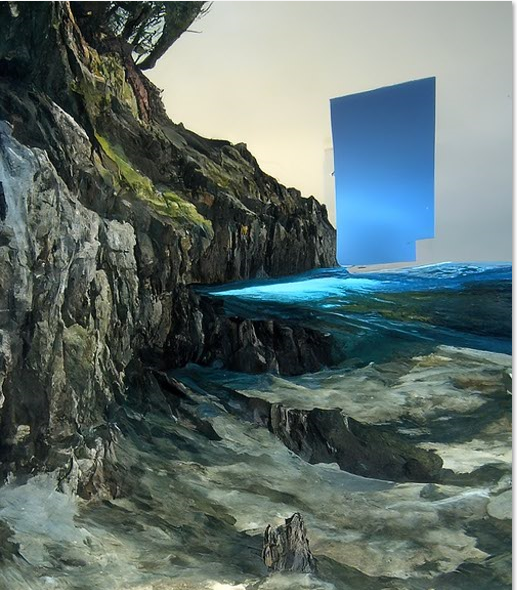
    - reduced the `clamp_max` from 0.03 to 0.025 as theres only a few artefacts - this made it worse
    - increased `clamp_max` to 0.4 - but this didn't help and broke saturation
- On a whim i flicked on `diffusion_sampling_mode` to `plms` and got some really interesting outputs
    - These were each quite significantly better all on their own...
      - If going to use this regularly I'd want to change the default run number down
    
- Whilst this first pass is generating some eye-pleasing levels of depth, I'm wondering if the base images should always be made as flat as possible, and then leave it entirely up to the second pass to handle this
  - would then need to give a high weight to that prompt
  
> note: the whim run using plms was so outstanding compared with previous results that I should look closer into the effect of Eta, as there might be a nice balance I like between the two sampling modes

## final image prompt

In [ ]:
{
    # Prompt & Settings
    "text_prompts": {
        "0": [
           "The city sprawls across the under sea chasm, its buildings clinging to the sides like gargoyles. The water is a deep blue, almost black, and it seems to go on forever:3",
           "by Dan Flavin and Lawren Harris:2",
           "style of cyberpunk, synthwave, dark academia:1.5",
           "text, signature, signatures, blur, blurry, depth of field, dof, bokeh, watermark, jpeg artifacts, specular highlights, noise, pixilation, low quality:-2",
           "featured on ArtStation, trending on ArtStation, cgsociety, trending on 500px, deviantart:1",
           "Unreal engine, Unity 3D, ray tracing, Octane render, CGI:1",
           "volumetric lighting, in the golden hour, dynamic lighting, dramatic lighting:1",
           "ultra wide angle, wide-angle, ultrawide:1"
        ]
    },
    "init_image": "",
    "image_prompts": {},
    
    # Output Settings
    "width":  512,
    "height": 832,
    "steps":  250, # Iterations in VoC
    
    # Diffusion Model & Settings
    "diffusion_model":         "512x512_diffusion_uncond_finetune_008100",
    "use_secondary_model":     true,
    "diffusion_sampling_mode": "ddim",
    
    # CLIP Models
    "ViTB32":                        false,
    "ViTB16":                        true,
    "ViTL14":                        false,
    "ViTL14_336px":                  false,
    "RN101":                         true,
    "RN50":                          false,
    "RN50x4":                        false,
    "RN50x16":                       false,
    "RN50x64":                       false,
    "ViTB32_laion2b_e16":            false,
    "ViTB32_laion400m_e31":          false,
    "ViTB32_laion400m_32":           false,
    "ViTB32quickgelu_laion400m_e31": false,
    "ViTB32quickgelu_laion400m_e32": false,
    "ViTB16_laion400m_e31":          false,
    "ViTB16_laion400m_e32":          false,
    "RN50_yffcc15m":                 false,
    "RN50_cc12m":                    false,
    "RN50_quickgelu_yfcc15m":        false,
    "RN50_quickgelu_cc12m":          false,
    "RN101_yfcc15m":                 false,
    "RN101_quickgelu_yfcc15m":       false,
    
    # General Settingss
    "clip_guidance_scale": 60000,
    "tv_scale":            8000,
    "range_scale":         100000,
    "sat_scale":           65000,
    "cutn_batches":        1,
    "max_frames":          10000,
    "init_scale":          1000,
    "skip_steps":          10,
    "perlin_init":         false,
    "perlin_mode":         "mixed",
    "skip_augs":           false,
    "randomize_class":     true,
    "clip_denoised":       false,
    "clamp_grad":          true,
    "clamp_max":           0.025,
    "seed":                188126024,
    "fuzzy_prompt":        false,
    "rand_mag":            0.05,
    "eta":                 0.8,
    "use_horizontal_symmetry": false,
    "use_vertical_symmetry":   false,
    
    # Cut Scheduling
    "cut_overview": "[14]*200+[12]*200+[4]*400+[0]*200",
    "cut_innercut": "[2]*200+[4]*200+[20]*600",
    "cut_ic_pow":   "[100]*900+[40]*100",
    "cut_icgray_p": "[0.7]*100+[0.6]*100+[0.45]*100+[0.3]*100+[0]*600",
    
    # Unknown Settings - yet to work out what these do
    "interp_spline":   "Linear",
    "key_frames":      true,
    "diffusion_steps": 1000,
    
    # Unused / Irrelevant to Image Generation (minified)
    "frames_scale": 1500,"frames_skip_steps": "60%","angle": "0:(0)","zoom": "0: (1), 10: (1.05)","translation_x": "0: (0)","translation_y": "0: (0)","translation_z": "0: (10.0)","rotation_3d_x": "0: (0)","rotation_3d_y": "0: (0)","rotation_3d_z": "0: (0)","midas_depth_model": "dpt_large","midas_weight": 0.3,"near_plane": 200,"far_plane": 10000,"fov": 40,"padding_mode": "border","sampling_mode": "bicubic","video_init_path": "/content/drive/MyDrive/init.mp4","extract_nth_frame": 2,"video_init_seed_continuity": false,"turbo_mode": false,"turbo_steps": "3","turbo_preroll": 10,"transformation_percent": [0.09],"video_init_steps": 100,"video_init_clip_guidance_scale": 1000,"video_init_tv_scale": 0.1,"video_init_range_scale": 150,"video_init_sat_scale": 300,"video_init_cutn_batches": 4,"video_init_skip_steps": 50,"video_init_frames_scale": 15000,"video_init_frames_skip_steps": "70%","video_init_flow_warp": true,"video_init_flow_blend": 0.999,"video_init_check_consistency": false,"video_init_blend_mode": "optical flow"
}